## Day 27 Lecture 1 Assignment

In this assignment, we will learn statistical significance in linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [119]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [120]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [121]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. To use these features, we must clean the data.

To simplify, we will remove the app, category, size, installs, genres, last updated, current ver, and android ver columns. 

In [122]:
# answer below:
reviews = reviews.drop(['App', 'Category', 'Size', 'Installs', 'Genres','Last Updated', 'Current Ver', 'Android Ver'], axis = 1)
reviews

,Rating,Reviews,Type,Price,Content Rating
0,4.100,159,Free,0,Everyone
1,3.900,967,Free,0,Everyone
2,4.700,87510,Free,0,Everyone
3,4.500,215644,Free,0,Teen
4,4.300,967,Free,0,Everyone
...,...,...,...,...,...
10836,4.500,38,Free,0,Everyone
10837,5.000,4,Free,0,Everyone
10838,nan,3,Free,0,Everyone
10839,4.500,114,Free,0,Mature 17+


Check for missing values and remove all rows containing missing values

In [123]:
# answer below:
reviews = reviews.dropna()
reviews

,Rating,Reviews,Type,Price,Content Rating
0,4.100,159,Free,0,Everyone
1,3.900,967,Free,0,Everyone
2,4.700,87510,Free,0,Everyone
3,4.500,215644,Free,0,Teen
4,4.300,967,Free,0,Everyone
...,...,...,...,...,...
10834,4.000,7,Free,0,Everyone
10836,4.500,38,Free,0,Everyone
10837,5.000,4,Free,0,Everyone
10839,4.500,114,Free,0,Mature 17+


Remove outliers from the Type and Content Rating columns (very rare values that won't train well).

In [124]:
# answer below:
print(reviews['Content Rating'].value_counts())
print(reviews['Type'].value_counts())

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64
Free    8719
Paid     647
Name: Type, dtype: int64


In [125]:
reviews = reviews.loc[(reviews['Content Rating'] != 'Adults only 18+') & (reviews['Content Rating'] != 'Unrated')]
reviews['Content Rating'].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

Convert the Type and Content Rating columns to a numeric format, whether by one-hot encoding, ordinal encoding, or similar.

In [126]:
# answer below:
from sklearn.preprocessing import OrdinalEncoder
reviews['Type'] = pd.get_dummies(reviews['Type'],drop_first=True)
content = pd.get_dummies(reviews['Content Rating'], drop_first=True)
reviews = reviews.drop(['Content Rating'], axis = 1)
cleaned = pd.concat([reviews, content], axis=1)
cleaned


,Rating,Reviews,Type,Price,Everyone 10+,Mature 17+,Teen
0,4.100,159,0,0,0,0,0
1,3.900,967,0,0,0,0,0
2,4.700,87510,0,0,0,0,0
3,4.500,215644,0,0,0,0,1
4,4.300,967,0,0,0,0,0
...,...,...,...,...,...,...,...
10834,4.000,7,0,0,0,0,0
10836,4.500,38,0,0,0,0,0
10837,5.000,4,0,0,0,0,0
10839,4.500,114,0,0,0,1,0


Finally, check that all the columns are of numeric type and change the type of columns that are not numeric. If coercing to numeric causes missing values, remove those rows containing missing values from our dataset.

In [127]:
# answer below:
cleaned['Reviews'] = cleaned['Reviews'].map(lambda x: float(x))

cleaned['Price'] = cleaned['Price'].map(lambda x: float(x[1::]) if x[0] == '$' else float(x))
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        9362 non-null   float64
 1   Reviews       9362 non-null   float64
 2   Type          9362 non-null   uint8  
 3   Price         9362 non-null   float64
 4   Everyone 10+  9362 non-null   uint8  
 5   Mature 17+    9362 non-null   uint8  
 6   Teen          9362 non-null   uint8  
dtypes: float64(3), uint8(4)
memory usage: 329.1 KB


Perform a train test split with 20% of the data in the test sample.

In [128]:
# answer below:
from sklearn.model_selection import train_test_split
y = cleaned['Rating']
X = cleaned.drop('Rating', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Now generate a linear model using statsmodels and produce a p value for each coefficient in the model. Analyze the results. (Look at the results table and at a homoscedasticity plot.)

In [129]:
# answer below:
import statsmodels.api as sm
X_const = sm.add_constant(X)
fit = sm.OLS(y, X_const).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     14.67
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           9.47e-17
Time:                        17:19:42   Log-Likelihood:                -7032.4
No. Observations:                9362   AIC:                         1.408e+04
Df Residuals:                    9355   BIC:                         1.413e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1759      0.006    673.905   

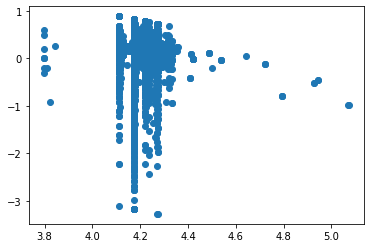

bartlett statistics: BartlettResult(statistic=24635.56401652322, pvalue=0.0)
levene statistics: LeveneResult(statistic=4867.627797979777, pvalue=0.0)


In [136]:
from sklearn.linear_model import LinearRegression
from scipy import stats

linear = LinearRegression()
linear.fit(X_train, y_train)

pred = linear.predict(X_train)
residual = y_train - pred

plt.scatter(pred, residual)
plt.show()

print('bartlett statistics: {}'.format(stats.bartlett(residual, pred)))
print('levene statistics: {}'.format(stats.levene(residual, pred)))


Scale your predictors and refit the linear model.

* How does this change the coefficients?
* How does this change the coefficients' p values?
* How does this change model performance?

In [151]:
# answer below:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_train)

add_const = sm.add_constant(scaled)

fit2  = sm.OLS(y_train, add_const).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     11.83
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           2.97e-13
Time:                        17:38:34   Log-Likelihood:                -5684.6
No. Observations:                7489   AIC:                         1.138e+04
Df Residuals:                    7482   BIC:                         1.143e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1755      0.007    597.274      0.0

The only significant coefficient change is for 'Review' column. The p-value remained mostly unchanged except for 'Everyone 10+'. It was 0.04 before now it is close to 0.05 and we can almost not reject null hypothesis. This implies the adjusted model is worse for this specific column. 